In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [67]:
x = 6 * np.random.rand(200,1) - 3
y =0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200,1)

#y =0.8x^2 + 0.9x + 2

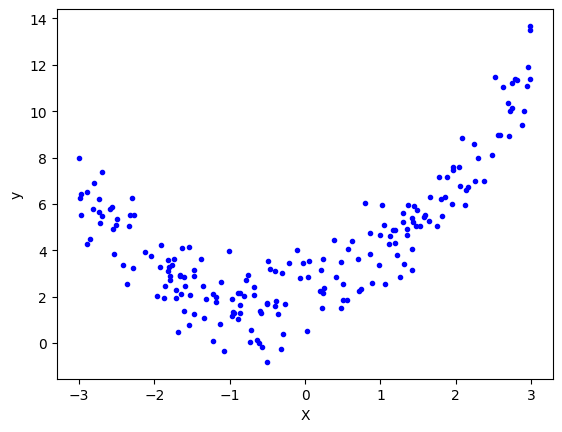

In [68]:
plt.plot(x,y,'b.')      # "b" is for blue color and "." is for marker style
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [69]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [70]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.3109668500704076

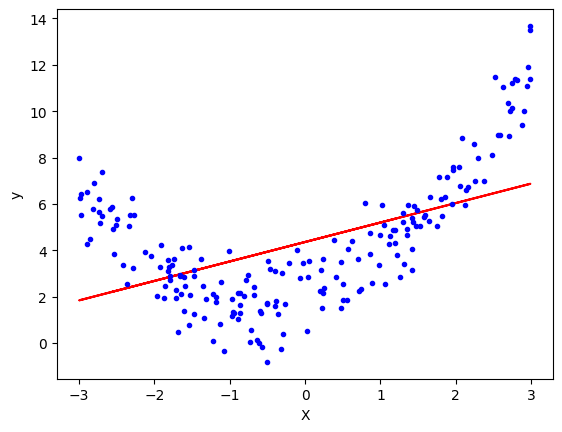

In [72]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b.')      # "b" is for blue color and "." is for marker style
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [73]:
# Applying polynomial linear regression

poly = PolynomialFeatures(degree=2,include_bias=True)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [74]:
print(x_train[0])
print(x_train_trans[0])

[-2.56283983]
[ 1.         -2.56283983  6.56814797]


In [75]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [76]:
y_pred = lr.predict(x_test_trans)
y_pred

array([[ 6.4602054 ],
       [ 6.15102042],
       [10.59559902],
       [ 4.7566316 ],
       [ 2.88209671],
       [ 2.82199984],
       [ 2.82683269],
       [ 6.69107771],
       [ 1.92520535],
       [ 4.91271771],
       [ 4.3113719 ],
       [10.16271461],
       [ 1.85449199],
       [ 2.11553026],
       [ 2.68212557],
       [ 4.06115969],
       [ 1.92352832],
       [ 1.82485467],
       [ 3.97403146],
       [ 1.82297944],
       [ 3.73103022],
       [ 2.8412518 ],
       [ 2.58543728],
       [10.269256  ],
       [ 2.3435918 ],
       [ 4.02381593],
       [ 4.89476887],
       [ 3.67368513],
       [ 2.05062376],
       [ 4.15796195],
       [ 5.55308631],
       [ 2.12818913],
       [ 1.87988965],
       [11.39919901],
       [ 9.15514985],
       [ 1.83380953],
       [ 1.96163195],
       [ 2.41658927],
       [11.52954176],
       [ 1.82885743]])

In [77]:
r2_score(y_test,y_pred)

0.8992145449372392

In [78]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8901373  0.76088824]]
[2.08331005]


In [79]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

In [80]:
X_new.shape

(200, 1)

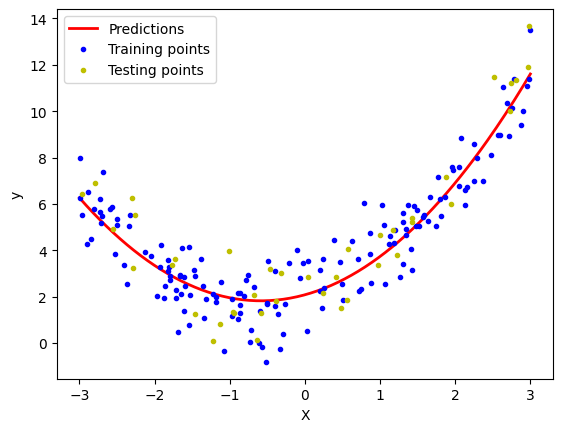

In [81]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "y.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [82]:

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "y.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

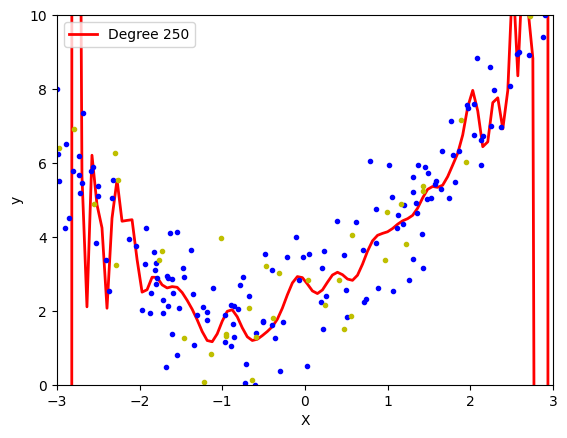

In [83]:
polynomial_regression(250)

In [84]:
poly.powers_

array([[0],
       [1],
       [2]])

c:\Users\Kirti Shendge\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



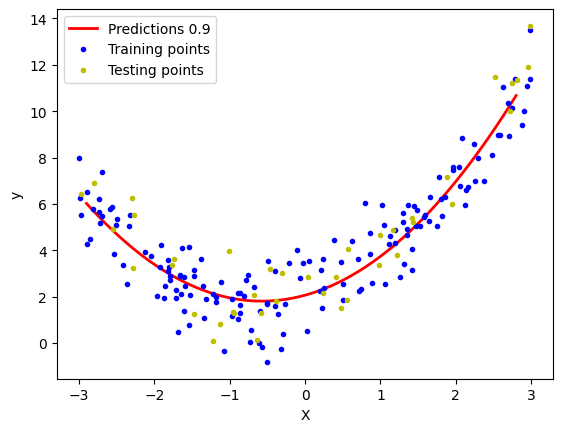

In [85]:
# Applying Gradient Descent

from sklearn.linear_model import SGDRegressor

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(x_train)
X_test_trans = poly.transform(x_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "y.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [86]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [87]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [88]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [89]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [90]:

X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [91]:

poly = PolynomialFeatures(degree=6)

X_multi_trans = poly.fit_transform(X_multi)


In [92]:
print("Transformed data shape:", X_multi_trans.shape)
print("Number of input features:", X_multi.shape[1])
print("Number of output features:", X_multi_trans.shape[1])

Transformed data shape: (100, 28)
Number of input features: 2
Number of output features: 28


In [93]:
X_multi_trans.shape


(100, 28)

In [94]:

lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [95]:
X_test_multi = poly.transform(final)


In [96]:
z_final = lr.predict(X_multi_trans).reshape(10,10)


In [97]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()